# Spectra generator for TSMC-Net-8-L



In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from numpy import asarray
import pandas as pd
import math
import seaborn as sns  #heat map
import glob # batch processing of images


import matplotlib.font_manager as fm
import random
import sys
import os

from sklearn.datasets import make_regression
# import tensorflow as tf
from sklearn.metrics import confusion_matrix    #confusion matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

from scipy import signal
from scipy import interpolate

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

#Sklearn model saving and loading
from joblib import dump, load

if '../../' not in sys.path:
    sys.path.append('../../')

from aimos.spectral_datasets.THz_datasets import THz_data

from aimos.misc.utils import simple_plotter


#Set random seed
# os.environ['PYTHONHASHSEED'] = str(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# tf.random.set_seed(42)  8
# tf.random.get_global_generator().reset_from_seed(42)
np.random.seed(42)
random.seed(42)



In [2]:
from oneida import THz_mixture_data
from oneida_utils import concentrations_to_one_hot_encode, create_mixture_names

2022-11-12 23:07:36.524024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 23:07:36.665192: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-12 23:07:36.669527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-11-12 23:07:36.669540: I tensorflow/stream_execu

# Create training(D)+ validation(V) mixtures

In [3]:
TAAT = 0.001 
ASAT=0.01
# ASAT=0.005
RSAT=0.01
# RSAT=0.005

In [4]:
m = THz_mixture_data(resolution=0.016, pressure='1 Torr', verbosity=False)
m.initiate_THz_mixture_data(TAAT = TAAT, 
                               ASAT=ASAT, 
                               RSAT=RSAT)

reduced_labels = m.labels
reduced_labels.remove('')
reduced_labels.remove(' ')
reduced_labels.remove('Diluent')
print(reduced_labels)


Components :  [[0 1 2 3 4 5 6 7 8]]
Components shape :  (1, 9)
TAAT =  0.001
ASAT =  0.01
RSAT =  0.01
['$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$HCOOH$', '$HNO_3$']


In [9]:
freq_GHz = 29.9792458*m.frequencies

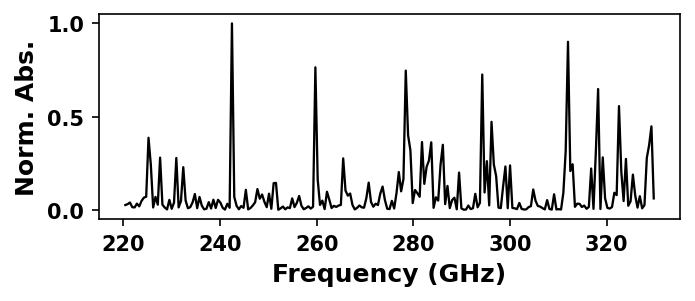

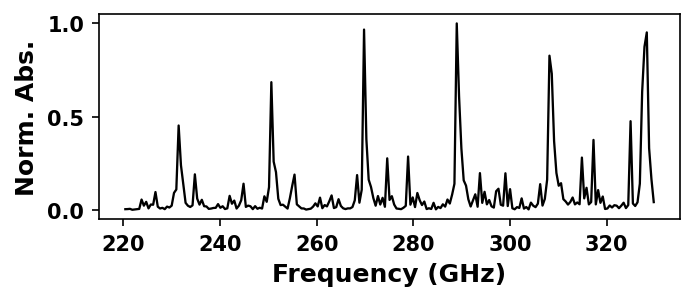

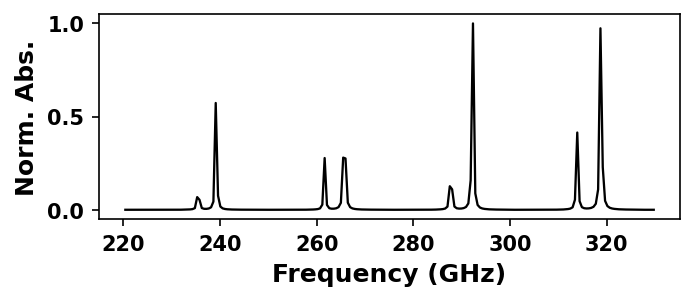

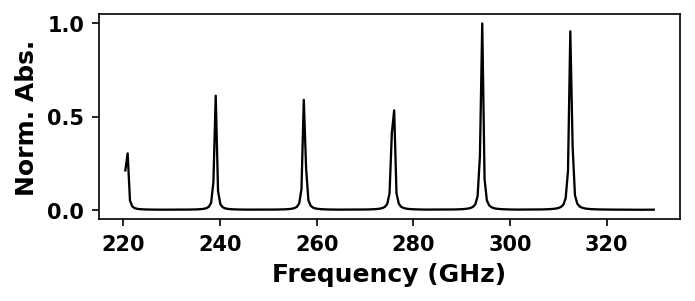

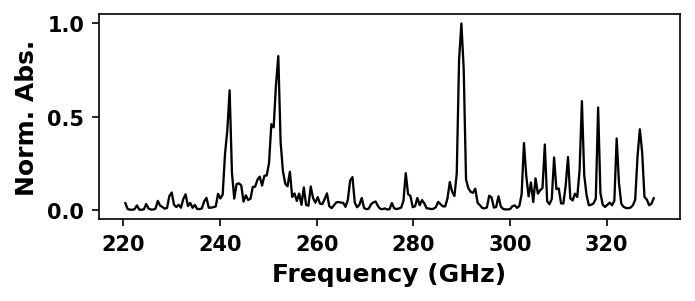

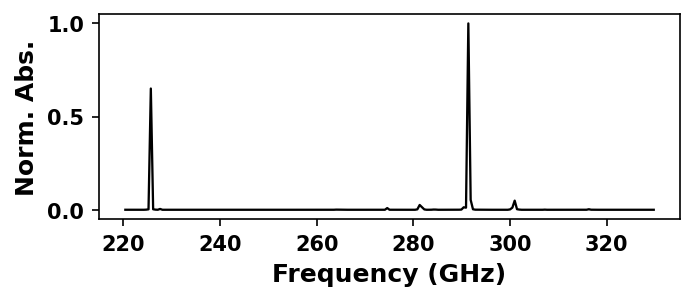

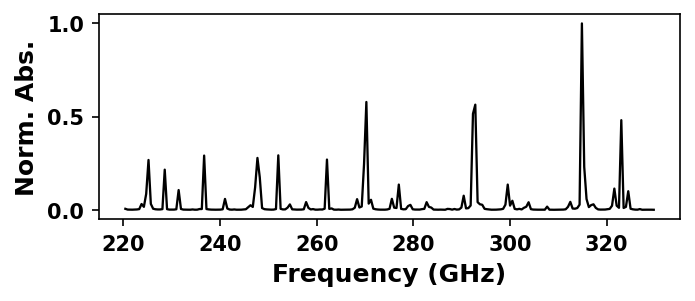

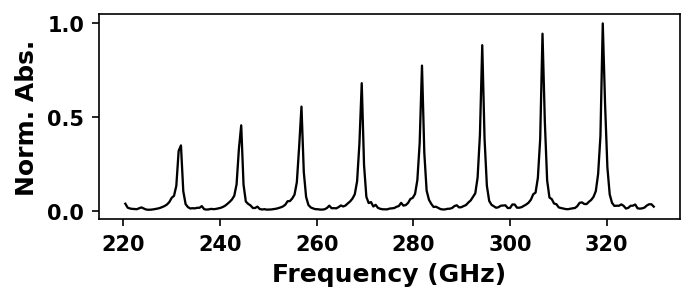

In [27]:
# Visualize all basis spectra at the same time

plt.rc('font', weight='bold')




plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='black')
plt.plot(freq_GHz, m.basis_C2H5OH/max(m.basis_C2H5OH),label="C2H5OH", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_C2H5OH' +  '.png', bbox_inches='tight')

plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_CH3CHO/max(m.basis_CH3CHO),label="CH3CHO", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_CH3CHO' +  '.png', bbox_inches='tight')

plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_CH3Cl/max(m.basis_CH3Cl),label="CH3Cl", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_CH3Cl' +  '.png', bbox_inches='tight')

plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_CH3CN/max(m.basis_CH3CN),label="CH3CN", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_CH3CN' +  '.png', bbox_inches='tight')

figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_CH3OH/max(m.basis_CH3OH),label="CH3OH", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_CH3OH' +  '.png', bbox_inches='tight')

plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_H2CO/max(m.basis_H2CO),label="H2CO", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_H2CO' +  '.png', bbox_inches='tight')

figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_HCOOH/max(m.basis_HCOOH),label="HCOOH", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_HCOOH' +  '.png', bbox_inches='tight')

plt.figure(figsize=(5, 1.81), dpi=150, facecolor='w', edgecolor='k')
plt.plot(freq_GHz, m.basis_HNO3/max(m.basis_HNO3),label="HNO3", linewidth = 1.1, color='black');
plt.xlabel('Frequency (GHz)', fontsize='large', fontweight = 'bold')
plt.ylabel('Norm. Abs.', fontsize='large', fontweight='bold')
# plt.legend();
plt.savefig(r'RESULTS/data_analytics/'+'basis_HNO3' +  '.png', bbox_inches='tight')

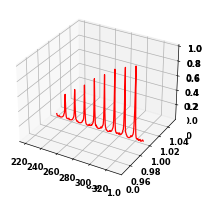

In [189]:

fig = plt.figure(figsize=(4,4),dpi=60)
ax = plt.axes(projection='3d')
ax.grid(visible=False)

ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
zline = z
xline = x
yline = y
ax.plot3D(xline, yline, zline, 'red')

# Data for three-dimensional scattered points
# zdata = z
# xdata = x
# ydata = y
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')


In [184]:
x,z = freq_GHz, m.basis_HNO3/max(m.basis_HNO3)

In [186]:
y=np.ones(229,)

In [29]:
from aimos.misc.analytics import plot_compound_counts
from aimos.misc.analytics import plot_dataset_property


In [30]:
# initialize
TAAT = 0.001 
ASAT=0.01
RSAT=0.01

m = THz_mixture_data(resolution=0.016, pressure='1 Torr', verbosity=False)
m.initiate_THz_mixture_data(TAAT = TAAT, 
                               ASAT=ASAT, 
                               RSAT=RSAT)

reduced_labels = m.labels
reduced_labels.remove('')
reduced_labels.remove(' ')
reduced_labels.remove('Diluent')
print('reduced_labels', reduced_labels)


# data_filename = "datasets/TSMCN-5-L-229_DV_04-09-2022_time_22-26-37.pkl"
data_filename = "datasets/TSMCN-8-L-229_DV__TAAT_0.001_ASAT_0.01_RSAT_0.01_20-10-2022_time_23-16-29_class_cnt_90.pkl"
DV = pd.read_pickle(data_filename)
y = DV['y'].to_numpy()
mixture_names = DV['mixture_names'].to_numpy()
y_concentrations = DV[['y_c0', 'y_c1', 'y_c2','y_c3', 'y_c4', 'y_c5', 'y_c6', 'y_c7']].to_numpy()
X = DV.drop(['y','mixture_names', 'y_c0', 'y_c1', 'y_c2','y_c3', 'y_c4', 'y_c5', 'y_c6', 'y_c7'],axis=1).to_numpy()

final_neuron_number = np.unique(y, axis=0).shape[0]
print('Number of neurons in the final layer :', final_neuron_number)

print('labels from class:', m.labels)

Components :  [[0 1 2 3 4 5 6 7 8]]
Components shape :  (1, 9)
TAAT =  0.001
ASAT =  0.01
RSAT =  0.01
reduced_labels ['$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$HCOOH$', '$HNO_3$']
Number of neurons in the final layer : 255
labels from class: ['$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$HCOOH$', '$HNO_3$']


In [31]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(mixture_names)

mixture_types=le.classes_
# print(mixture_types)

In [32]:
#split intro train and validation set

#seeds used 123,237, 786
from sklearn.model_selection import train_test_split

global_indices=range(0, X.shape[0])
print(global_indices)

# (np.expand_dims(X,-1)
TRAIN_SIZE=0.60
VAL_SIZE=1-TRAIN_SIZE

x_train, x_val, y_train, y_val, train_indices, val_indices = train_test_split(np.expand_dims(X, axis=-1), y, global_indices, train_size=TRAIN_SIZE,
                                                   test_size=VAL_SIZE,
                                                   random_state=786,
                                                    stratify=y

                                                   )

print('X_train shape:', x_train.shape)
print('y_ohe_train shape:', y_train.shape)

print('X_val shape:', x_val.shape)
print('y_ohe_val shape:', y_val.shape)


print("All:", np.bincount(y) / float(len(y))*100  )
print("Training:", np.bincount(y_train) / float(len(y_train))*100  )
print("Validation:", np.bincount(y_val) / float(len(y_val))*100  )


range(0, 22950)
X_train shape: (13770, 229, 1)
y_ohe_train shape: (13770,)
X_val shape: (9180, 229, 1)
y_ohe_val shape: (9180,)
All: [0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686
 0.39215686 0.39215686 0.39215686 0.39215686 0.39215686 0.39215

In [41]:
DV.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,
       ...
                   'y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],
      dtype='object', length=239)

In [44]:
spectraframe = pd.DataFrame()
spectraframe = DV
spectraframe['mean_abs'] = DV.drop(labels=['y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],axis = 1).mean(axis = 1)

spectraframe['norm_std_abs'] = DV.drop(labels=['y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],axis = 1).std(axis = 1)/DV.drop(labels=['y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],axis = 1).mean(axis = 1)

spectraframe['norm_max_abs'] = DV.drop(labels=['y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],axis = 1).max(axis = 1)/DV.drop(labels=['y', 'mixture_names',          'y_c0',          'y_c1',
                'y_c2',          'y_c3',          'y_c4',          'y_c5',
                'y_c6',          'y_c7'],axis = 1).mean(axis = 1)

In [45]:
def plot_compound_counts(df, title = 'spectra', color = 'blue', save_to_file = True):
    fig, ax = plt.subplots()
    fig.set_figheight(9)
    fig.set_figwidth(16)
    ax = sns.countplot(x="mixture_names", color=color,  data=df)
    ax.set_xlabel('Mixture names')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);
    
    
    plt.tight_layout()
    
    if save_to_file == True:
        plt.savefig('RESULTS/Analytics_Figures/' + title + '.png', dpi=300)
    
    
    
    return fig, ax

In [111]:
def plot_dataset_property(df, y_prop, title = 'spectra',  ylabel = 'Maximum Absorbance', color = 'red', save_to_file = True):    
#     sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(16)
    
#     ax.scatter(df.y.to_numpy(), df[y_prop].to_numpy(),s=1, color=color)
#     ax = sns.barplot(x='y', y=y_prop, color=color,  data=df,capsize=.2)
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="mixture_names", y=y_prop, data=df,
                whis=[0, 100], width=.2, palette="vlag")

    # Add in points to show each observation
    sns.stripplot(x="mixture_names", y=y_prop, data=df,
                  size=4, color=".3", linewidth=0)

    # Tweak the visual presentation
#     ax.xaxis.grid(True)

    sns.despine(trim=True, left=True)
    ax.set_xlabel('Mixture names')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);
    ax.tick_params(axis='both', which='major', labelsize=4)
    ax.tick_params(axis='both', which='minor', labelsize=3)
    
    if save_to_file == True:
        plt.savefig('RESULTS/Analytics_Figures/' + title + '.png', dpi=300)

In [112]:
train_sf = spectraframe.iloc[train_indices].sort_index()
val_sf = spectraframe.iloc[val_indices].sort_index()



In [113]:
# plot_compound_counts(train_sf, 'Counts (Training Spectra)', color = 'red', save_to_file=False )
# plot_compound_counts(test_sf, 'Counts (Testing Spectra)', color = 'blue', save_to_file=False )

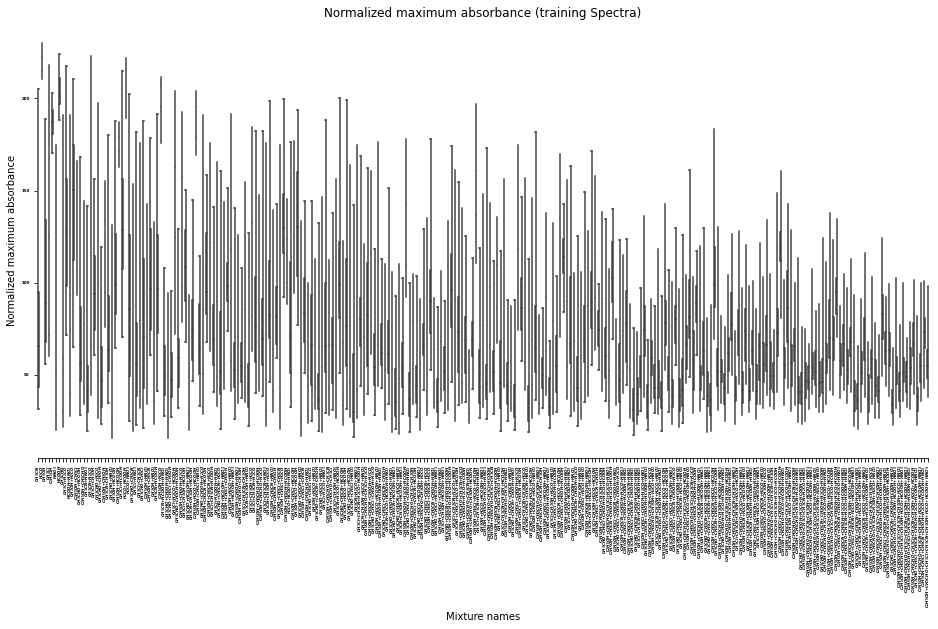

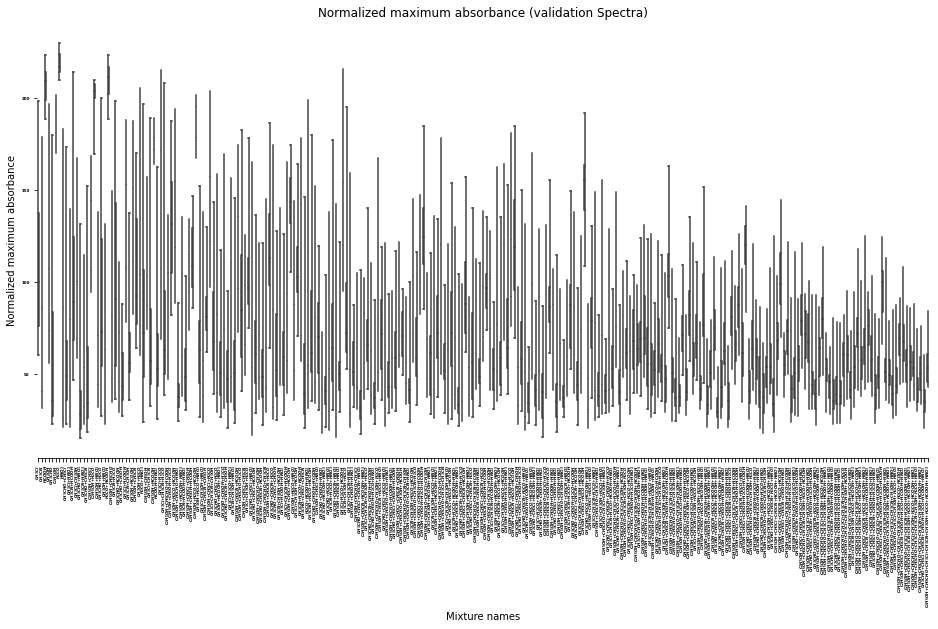

In [114]:
plot_dataset_property(train_sf, "norm_max_abs", title = 'Normalized maximum absorbance (training Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'red', save_to_file=False )
plot_dataset_property(val_sf, "norm_max_abs", title = 'Normalized maximum absorbance (validation Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'blue', save_to_file=False )


In [ ]:

plot_dataset_property(train_sf, "norm_max_abs", title = 'Normalized maximum absorbance (training Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_max_abs", title = 'Normalized maximum absorbance (testing Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'blue')
plot_dataset_property(train_sf, "mean_abs", title = 'Mean Absorbance (Training Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(test_sf, "mean_abs", title = 'Mean Absorbance (Test Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(train_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (training Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (testing Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'blue')


In [152]:
train_mean = train_sf.groupby('mixture_names', as_index=False)['norm_max_abs'].mean()
display(train_mean)

,mixture_names,norm_max_abs
0,$CH_3CHO$,51.067578
1,$CH_3CHO$+$CH_3CN$,50.808561
2,$CH_3CHO$+$CH_3CN$+$CH_3OH$,47.639131
3,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,50.703202
4,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$,36.791683
...,...,...
250,$HNO_3$,46.191221
251,$H_2CO$,218.736180
252,$H_2CO$+$HCOOH$,209.201143
253,$H_2CO$+$HCOOH$+$HNO_3$,85.039520


In [153]:
filtered_df = train_mean[train_mean.index < 128]
display(filtered_df)

,mixture_names,norm_max_abs
0,$CH_3CHO$,51.067578
1,$CH_3CHO$+$CH_3CN$,50.808561
2,$CH_3CHO$+$CH_3CN$+$CH_3OH$,47.639131
3,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,50.703202
4,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$,36.791683
...,...,...
123,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$,52.277167
124,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,63.331327
125,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$...,47.442435
126,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HNO_3$,42.329711


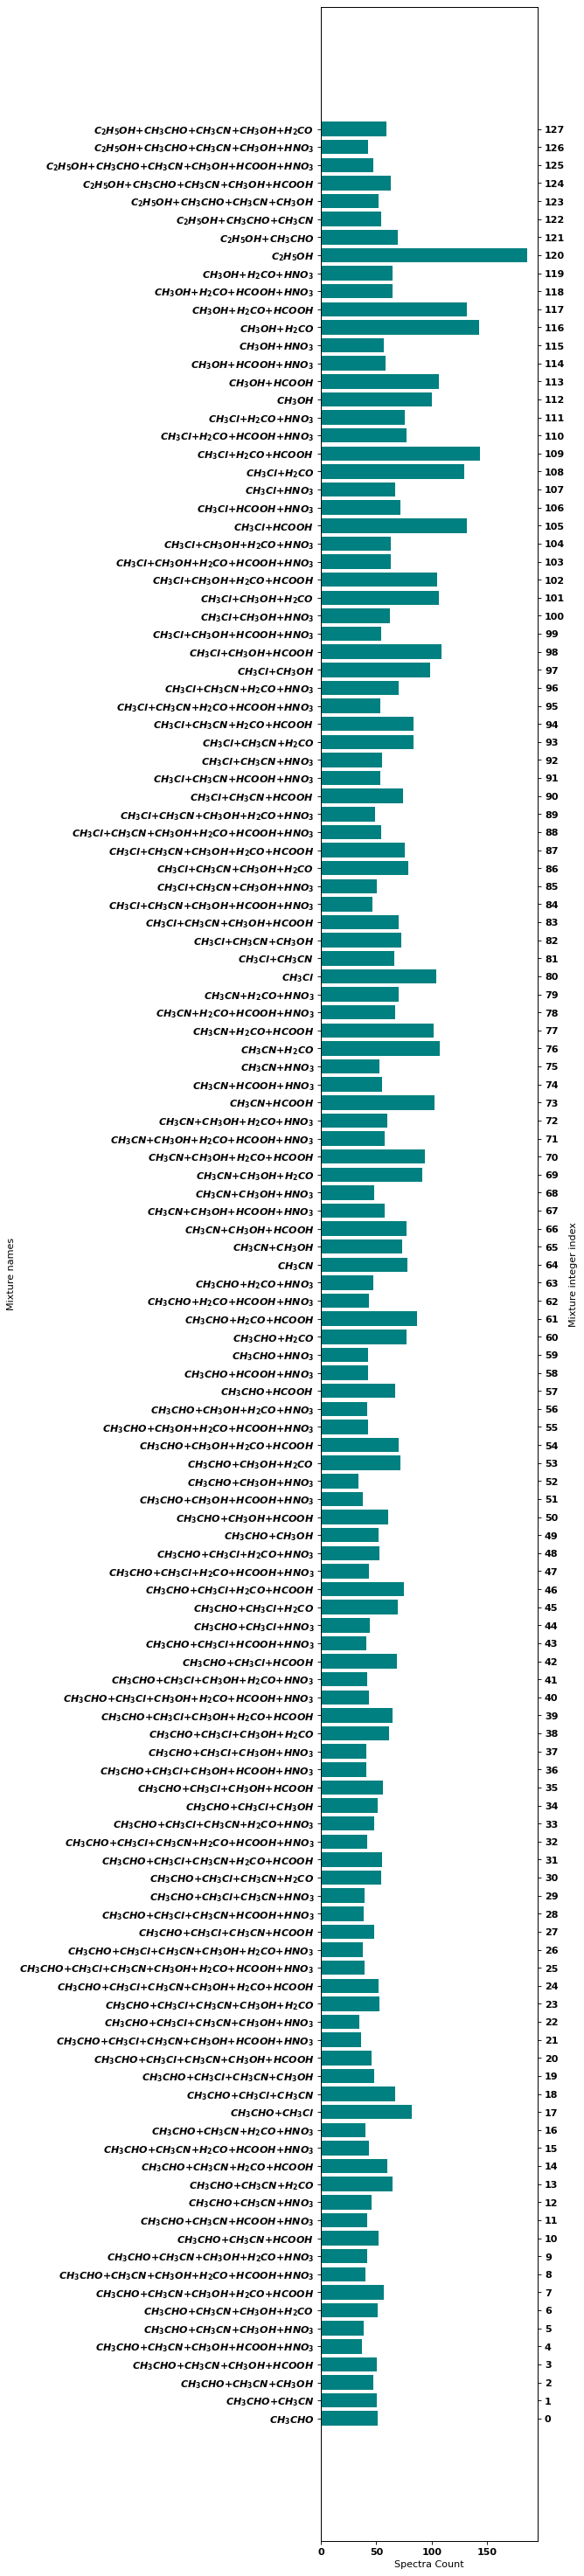

In [154]:
fig, ax1 = plt.subplots(figsize = (4,48),dpi=80)

ax2 = ax1.twinx()
ax1.barh(filtered_df['mixture_names'].to_list(), filtered_df['norm_max_abs'].to_list(), color='teal')
ax2.barh(filtered_df.index.to_list(), filtered_df['norm_max_abs'].to_list(), color='teal')

ax1.set_xlabel('Spectra Count')
ax1.set_ylabel('Mixture names', color='black')
ax2.set_ylabel('Mixture integer index', color='black')
ax2.yaxis.set_ticks(np.arange(0, 128, 1))
# plt.tight_layout()
plt.show()
fig.savefig(r'RESULTS/data_analytics/' + 'TSMC-Net' +'_norm_max_abs_train_1.png', bbox_inches='tight')

In [155]:
filtered_df = train_mean[train_mean.index > 127]
display(filtered_df)

,mixture_names,norm_max_abs
128,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,68.840120
129,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,56.222492
130,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,47.560726
131,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$HCOOH$,70.656637
132,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$HCOOH$+$HNO_3$,52.015093
...,...,...
250,$HNO_3$,46.191221
251,$H_2CO$,218.736180
252,$H_2CO$+$HCOOH$,209.201143
253,$H_2CO$+$HCOOH$+$HNO_3$,85.039520


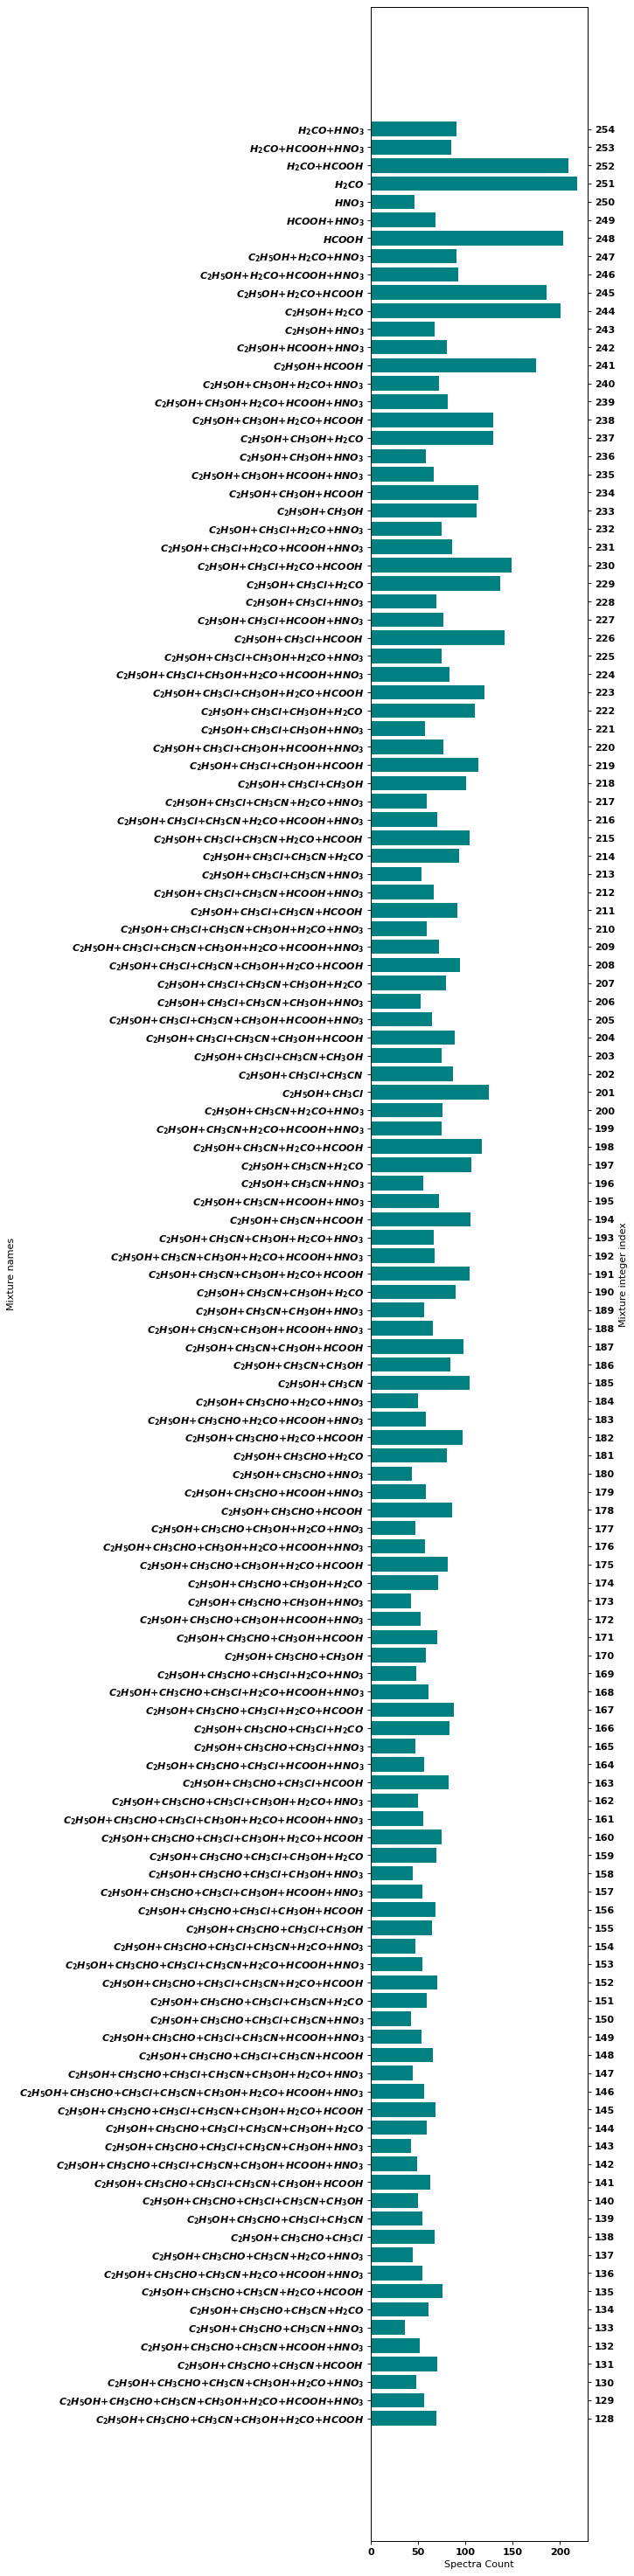

In [156]:
fig, ax1 = plt.subplots(figsize = (4,48),dpi=80)

ax2 = ax1.twinx()
ax1.barh(filtered_df['mixture_names'].to_list(), filtered_df['norm_max_abs'].to_list(), color='teal')
ax2.barh(filtered_df.index.to_list(), filtered_df['norm_max_abs'].to_list(), color='teal')

ax1.set_xlabel('Spectra Count')
ax1.set_ylabel('Mixture names', color='black')
ax2.set_ylabel('Mixture integer index', color='black')
ax2.yaxis.set_ticks(np.arange(128, 255, 1))
# plt.tight_layout()
plt.show()
fig.savefig(r'RESULTS/data_analytics/' + 'TSMC-Net' +'_norm_max_abs_train_2.png', bbox_inches='tight')

In [157]:
val_mean = val_sf.groupby('mixture_names', as_index=False)['norm_max_abs'].mean()
display(val_mean)

,mixture_names,norm_max_abs
0,$CH_3CHO$,57.409246
1,$CH_3CHO$+$CH_3CN$,50.697128
2,$CH_3CHO$+$CH_3CN$+$CH_3OH$,49.216319
3,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,53.059662
4,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$,36.072963
...,...,...
250,$HNO_3$,64.893733
251,$H_2CO$,219.019273
252,$H_2CO$+$HCOOH$,209.903186
253,$H_2CO$+$HCOOH$+$HNO_3$,86.192980


In [158]:
filtered_df = val_mean[val_mean.index < 128]
display(filtered_df)

,mixture_names,norm_max_abs
0,$CH_3CHO$,57.409246
1,$CH_3CHO$+$CH_3CN$,50.697128
2,$CH_3CHO$+$CH_3CN$+$CH_3OH$,49.216319
3,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,53.059662
4,$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$,36.072963
...,...,...
123,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$,52.639513
124,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$,66.675874
125,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$...,51.497995
126,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HNO_3$,40.540593


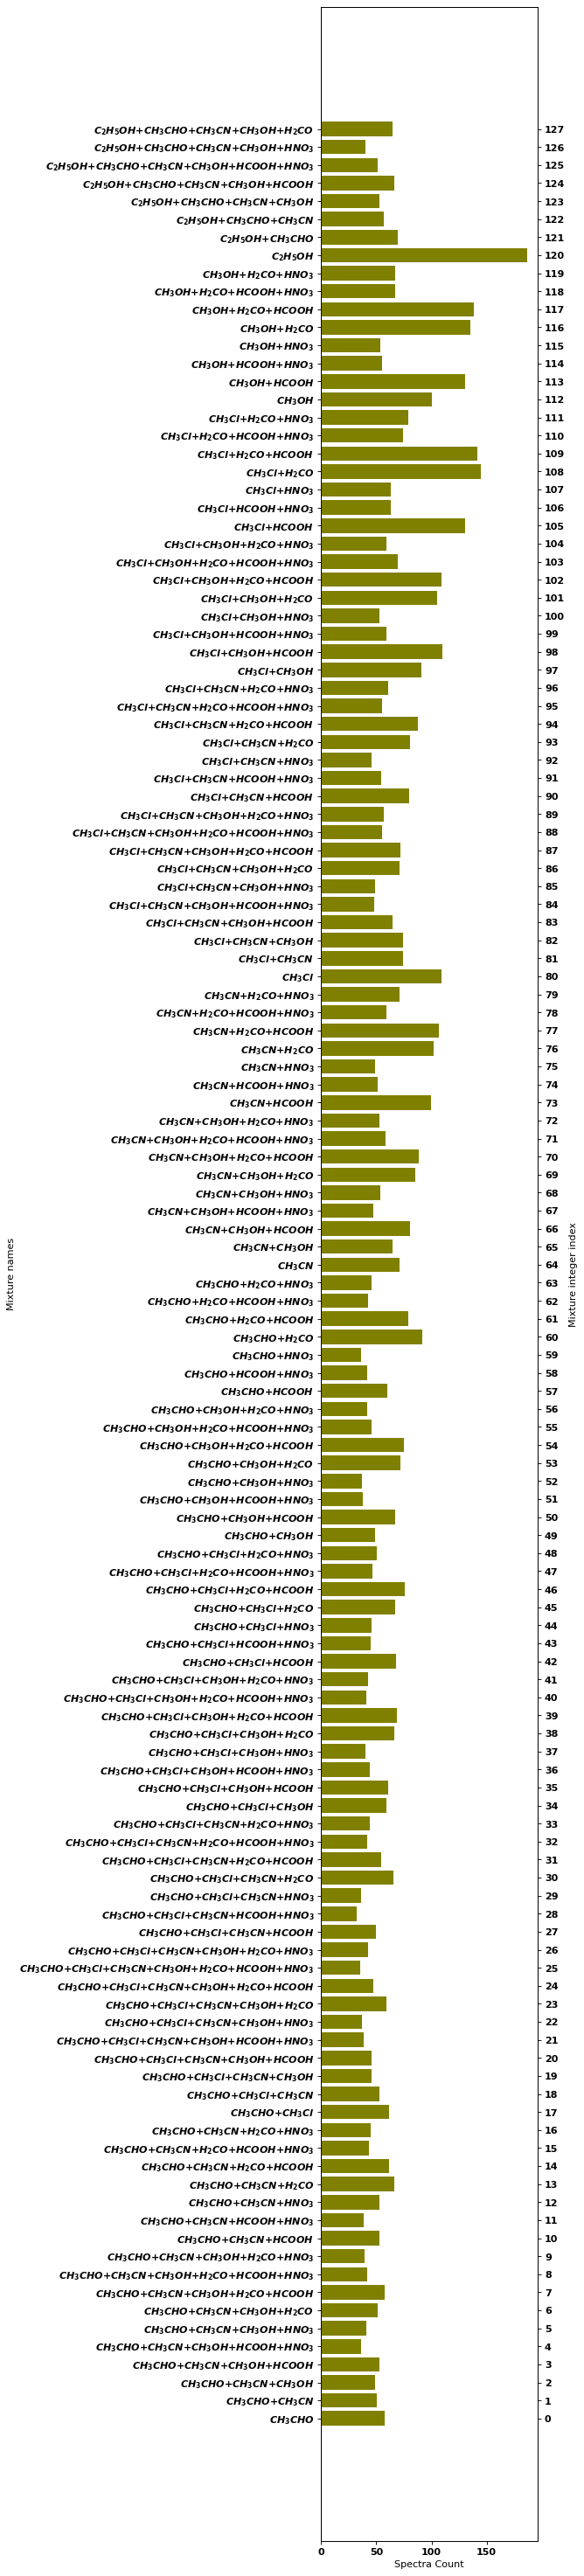

In [159]:
fig, ax1 = plt.subplots(figsize = (4,48),dpi=80)

ax2 = ax1.twinx()
ax1.barh(filtered_df['mixture_names'].to_list(), filtered_df['norm_max_abs'].to_list(), color='olive')
ax2.barh(filtered_df.index.to_list(), filtered_df['norm_max_abs'].to_list(), color='olive')

ax1.set_xlabel('Spectra Count')
ax1.set_ylabel('Mixture names', color='black')
ax2.set_ylabel('Mixture integer index', color='black')
ax2.yaxis.set_ticks(np.arange(0, 128, 1))
# plt.tight_layout()
plt.show()
fig.savefig(r'RESULTS/data_analytics/' + 'TSMC-Net' +'_norm_max_abs_val_1.png', bbox_inches='tight')

In [160]:
filtered_df = val_mean[val_mean.index > 127]
display(filtered_df)

,mixture_names,norm_max_abs
128,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,71.093707
129,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,57.474223
130,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$...,44.635729
131,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$HCOOH$,74.317815
132,$C_2H_5OH$+$CH_3CHO$+$CH_3CN$+$HCOOH$+$HNO_3$,53.743163
...,...,...
250,$HNO_3$,64.893733
251,$H_2CO$,219.019273
252,$H_2CO$+$HCOOH$,209.903186
253,$H_2CO$+$HCOOH$+$HNO_3$,86.192980


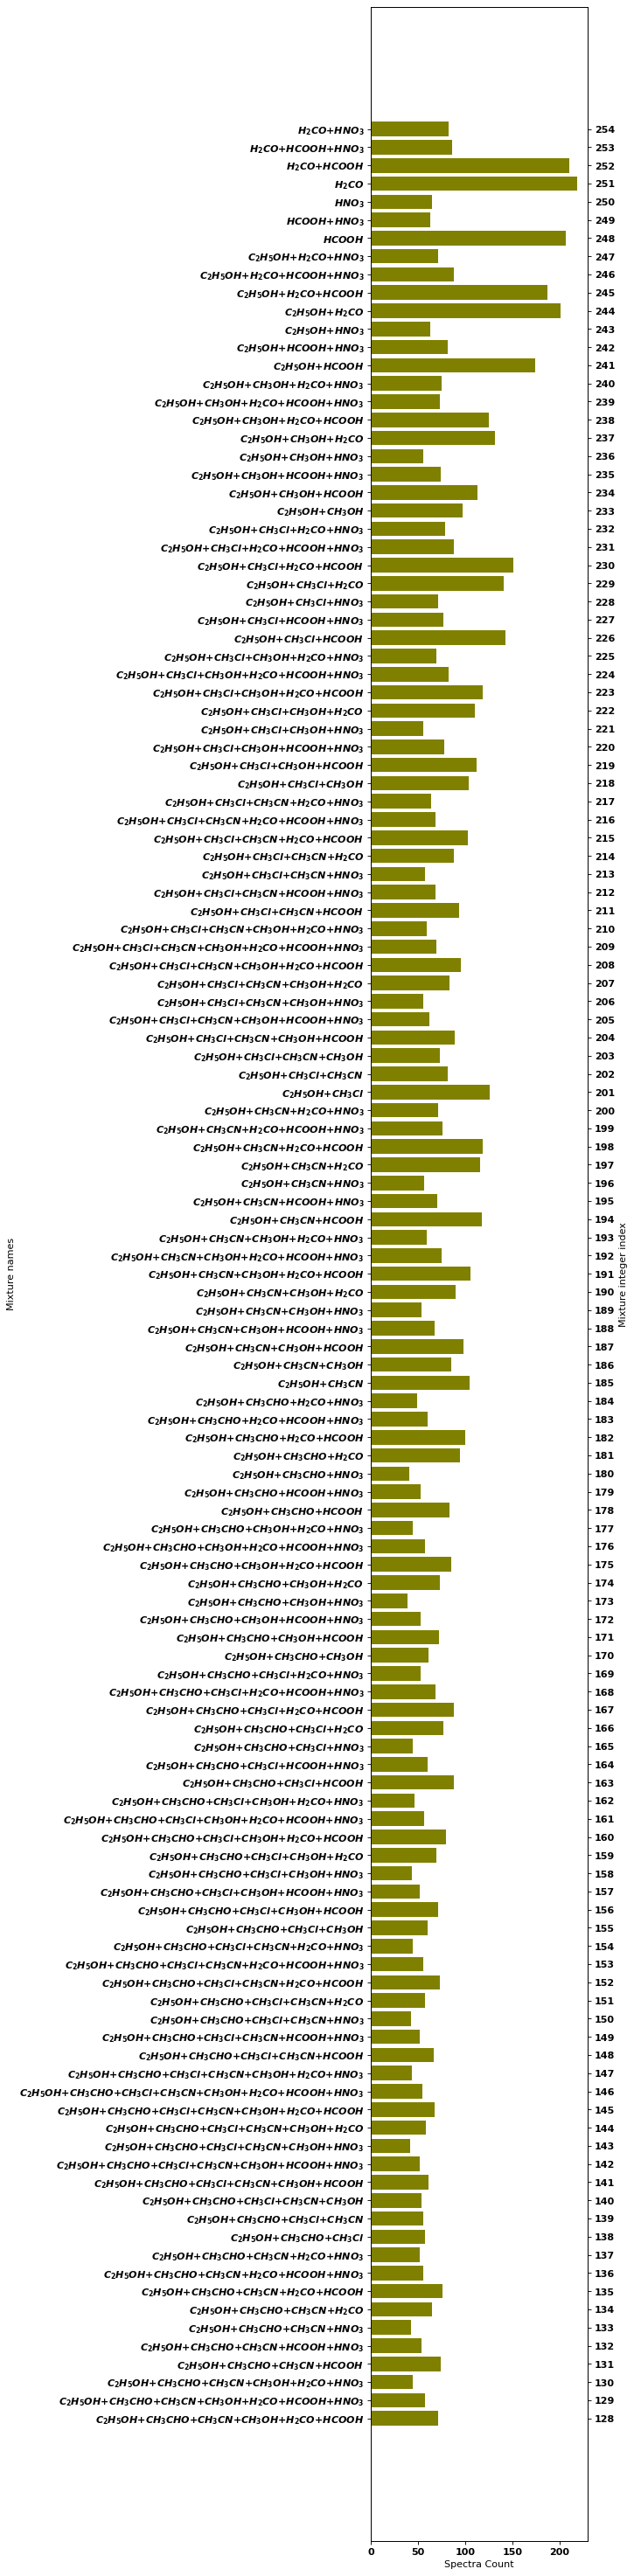

In [161]:
fig, ax1 = plt.subplots(figsize = (4,48),dpi=80)

ax2 = ax1.twinx()
ax1.barh(filtered_df['mixture_names'].to_list(), filtered_df['norm_max_abs'].to_list(), color='olive')
ax2.barh(filtered_df.index.to_list(), filtered_df['norm_max_abs'].to_list(), color='olive')

ax1.set_xlabel('Spectra Count')
ax1.set_ylabel('Mixture names', color='black')
ax2.set_ylabel('Mixture integer index', color='black')
ax2.yaxis.set_ticks(np.arange(128, 255, 1))
# plt.tight_layout()
plt.show()
fig.savefig(r'RESULTS/data_analytics/' + 'TSMC-Net' +'_norm_max_abs_val_2.png', bbox_inches='tight')

# notebook ends!